In [1]:
__authors__ = "Akshay Agarwal, Manish Das, Jaro Habr, Parag Kanade"
__version__ = "XCS229ii, Stanford, Spring 2021"

# Data Augmentation

In [102]:
%load_ext autoreload
%autoreload 2

In [54]:
import os

# needed to get the path right
os.chdir("..")

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

/Users/jh/ai/courses/stanford/3-ML_RL


In [55]:
from constants import TRAIN_DIR
from utils.dataloader import SimpleDataLoader


simple_data_loader = SimpleDataLoader(
    images_folder_path=os.path.join(TRAIN_DIR, "images"),
    masks_folder_path=os.path.join(TRAIN_DIR, "masks"),
    size=10
)

train_data = simple_data_loader.get_images_masks()
train_images = train_data["images"]
train_masks = train_data["masks"]

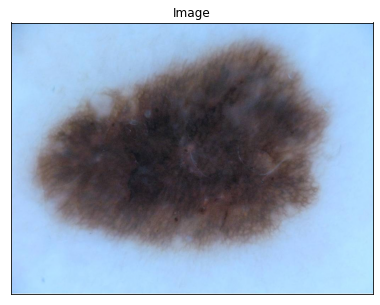

In [56]:
from utils.helper import Visualisation

index = 0
original_image = train_images[index]

Visualisation().plot_images(image=original_image.squeeze())

## Advanced Augmentation

In [117]:
from utils.augmentation import DataAugmentation
import numpy as np

index = 0
image = (train_images[index] * 255.0).astype(np.uint8)
mask = (train_masks[index] * 255.0).astype(np.uint8)

augmented_data = DataAugmentation().apply_advanced(image=image, mask=mask)
augmented_image = augmented_data["image"]
augmented_mask = augmented_data["mask"]

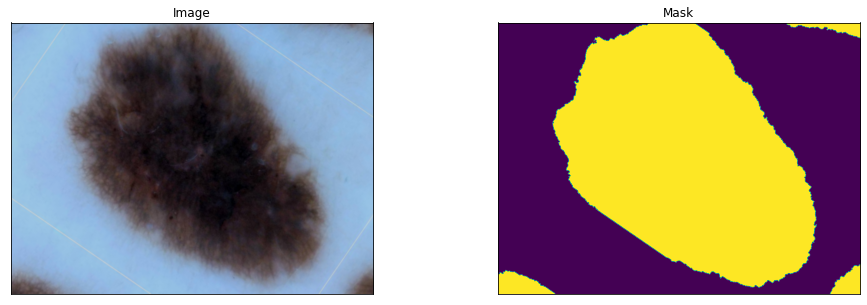

In [118]:
Visualisation().plot_images(image=augmented_image.squeeze(), mask=augmented_mask.squeeze())

## Hair Augmentation

In [125]:
from utils.augmentation import AdvancedHairAugmentation

index = 0
image = np.copy(train_images[index])

hair_augmented_image = AdvancedHairAugmentation().apply(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


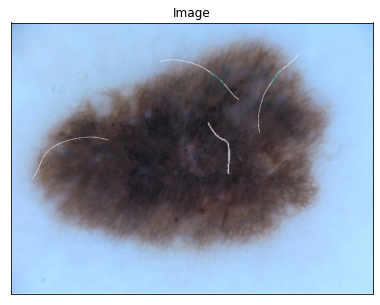

In [126]:
Visualisation().plot_images(image=hair_augmented_image.squeeze())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


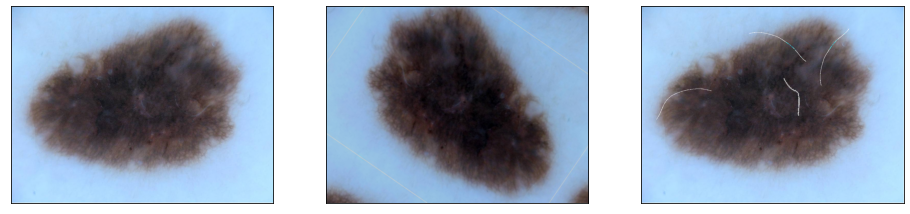

In [127]:
from matplotlib.backends.backend_pdf import PdfPages
from constants import PROJECT_DIR
import matplotlib.pyplot as plt

images = {
    "original_image": original_image.squeeze(),
    "augmented_image": augmented_image.squeeze(),
    "hair_augmented_image": hair_augmented_image.squeeze()
}

n = len(images)

with PdfPages(os.path.join(PROJECT_DIR, "figures", "data_augmentation.pdf")) as pdf:
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        # plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    pdf.savefig(bbox_inches='tight')
    plt.show()